# Projeto 2 - Ciência dos Dados - 2020.2 

### Previsão da demanda em lojas Walmart estadunidenses a fim de evitar o desperdício, maximizando o lucro nesses estabelecimentos

#### Equipe: Andressa Silva de Oliveira; Camila Buzin Ladeira; Luiz Ricardo Hardman; Matheus Kwon

## - Introdução -

In [1]:
# Objetivo:

# Descrição da base de dados:

## - Minerando Dados e Características do Dataset -

In [2]:
# Bibliotecas importadas:
import os
import pandas as pd
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt

import statsmodels.api as sm
import seaborn as sns

In [3]:
# Código para reconhecimento do dataset:
filename = 'Walmart_Store_sales.xlsx'

if filename in os.listdir():
    print(f'Encontrei o arquivo {filename}, tudo certo!')
else:
    print(f'Não encontrei o arquivo {filename} no diretório {os.getcwd()}')

Encontrei o arquivo Walmart_Store_sales.xlsx, tudo certo!


In [4]:
# Código para leitura do dataset:
data = pd.read_excel(filename)
data.head(5)

,"Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment"
0,"1,05-02-2010,1643690.9,0,42.31,2.572,211.09635..."
1,"1,12-02-2010,1641957.44,1,38.51,2.548,211.2421..."
2,"1,19-02-2010,1611968.17,0,39.93,2.514,211.2891..."
3,"1,26-02-2010,1409727.59,0,46.63,2.561,211.3196..."
4,"1,05-03-2010,1554806.68,0,46.5,2.625,211.35014..."


In [5]:
# Manipulação do dataset para fins do projeto

linhas = data['Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment']

dicio = {'store':[], 'date':[], 'weeklysales':[], 'holiday':[], 'temperature':[], 'fuel':[], 'cpi':[], 'unemployment':[]}

# Separação das colunas no dicionário, em forma de listas

for linha in linhas:
    results = linha.split(',')
    i = 0
    for key in dicio.keys():
        variable = results[i]
        if key != 'date' and key != 'holiday' and key != 'store':
            variable = float(results[i])
        dicio[key].append(variable)
        i += 1

In [6]:
# Transformando o dicionário em dataframe:

df = pd.DataFrame()
for key, lista in dicio.items():
    df[key] = pd.Series(lista)

In [7]:
# Transformando as variáveis de acordo com o seu tipo:

df.holiday = df.holiday.astype('category') # define a característica da data(ser feriado ou não) como qualitativa
df.holiday.cat.categories = ['no', 'yes']
df.store = df.store.astype('category') # define o número da loja como variável qualitativa ordinal
df.date = pd.to_datetime(df.date) # define a variável para datas
df.unemployment = (df.unemployment)/100 # taxa de desemprego(em porcentagem)/100
df

,store,date,weeklysales,holiday,temperature,fuel,cpi,unemployment
0,1,2010-05-02,1643690.90,no,42.31,2.572,211.096358,0.08106
1,1,2010-12-02,1641957.44,yes,38.51,2.548,211.242170,0.08106
2,1,2010-02-19,1611968.17,no,39.93,2.514,211.289143,0.08106
3,1,2010-02-26,1409727.59,no,46.63,2.561,211.319643,0.08106
4,1,2010-05-03,1554806.68,no,46.50,2.625,211.350143,0.08106
...,...,...,...,...,...,...,...,...
6430,45,2012-09-28,713173.95,no,64.88,3.997,192.013558,0.08684
6431,45,2012-05-10,733455.07,no,64.89,3.985,192.170412,0.08667
6432,45,2012-12-10,734464.36,no,54.47,4.000,192.327265,0.08667
6433,45,2012-10-19,718125.53,no,56.47,3.969,192.330854,0.08667


/opt/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


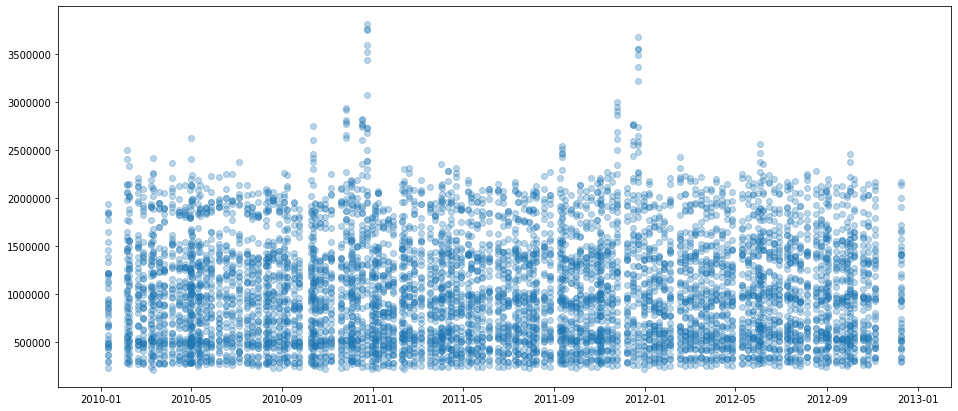

In [8]:
plt.figure(figsize=(16, 7))
plt.scatter(df.date, df.weeklysales, alpha=0.3)

Store 38, year 2011


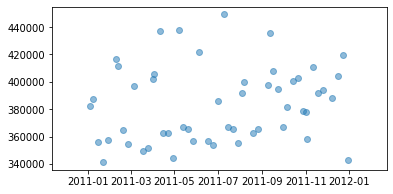

Store 25, year 2011


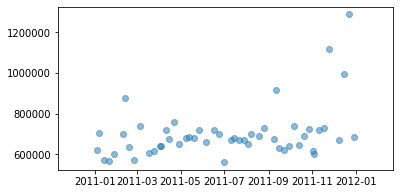

Store 25, year 2011


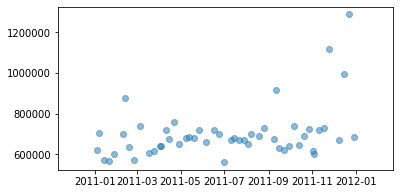

In [9]:
import random
for x in range(3):
    
    n = random.randint(1,45)
    year = random.randint(2010,2012)
    
    filtroano = []
    for i in df.date:
        if i.year == year:
            filtroano.append(True)
        else:
            filtroano.append(False)
    
    filtro_1 = df.store == str(n)
    
    datesano_1 = []
    for i in range(len(df)):
        if df.date[i].year == year and df.store[i] == str(n):
            datesano_1.append(df.date[i])
    
    salesyear_1 = df.loc[filtroano & filtro_1,'weeklysales']
    
    print(f'Store {n}, year {year}')
    plt.figure(figsize=(6, 3))
    plt.scatter(datesano_1, salesyear_1, alpha=0.5)
    plt.show()

In [10]:
# Descrição das variáveis finais que serão utilizadas a partir deste ponto:


In [11]:
# Análise descritiva detalhada das variáveis

In [12]:
#data.columns
df_analise1 = df[['weeklysales','temperature','fuel','cpi','unemployment']]
df_analise1.describe()

,weeklysales,temperature,fuel,cpi,unemployment
count,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000
mean,1.046965e+06,60.663782,3.358607,171.578394,0.079992
std,5.643666e+05,18.444933,0.459020,39.356712,0.018759
min,2.099862e+05,-2.060000,2.472000,126.064000,0.038790
25%,5.533501e+05,47.460000,2.933000,131.735000,0.068910
50%,9.607460e+05,62.670000,3.445000,182.616521,0.078740
75%,1.420159e+06,74.940000,3.735000,212.743293,0.086220
max,3.818686e+06,100.140000,4.468000,227.232807,0.143130


In [13]:
df_analise1.isnull().sum()

weeklysales     0
temperature     0
fuel            0
cpi             0
unemployment    0
dtype: int64

In [14]:
# weeklysales com holiday
no = df.holiday == "no"
yes = df.holiday == "yes"

holiday_no = df.loc[no,["weeklysales"]]
holiday_yes = df.loc[yes,["weeklysales"]]

medidas_resumo_holiday_no = holiday_no.describe()
medidas_resumo_holiday_yes = holiday_yes.describe()

In [15]:
holiday_no

,weeklysales
0,1643690.90
2,1611968.17
3,1409727.59
4,1554806.68
5,1439541.59
...,...
6430,713173.95
6431,733455.07
6432,734464.36
6433,718125.53


In [16]:
medidas_resumo_holiday_no.round(3)

,weeklysales
count,5985.000
mean,1041256.380
std,558957.436
min,209986.250
25%,551378.390
50%,956211.200
75%,1414343.530
max,3818686.450


In [17]:
medidas_resumo_holiday_yes.round(3)

,weeklysales
count,450.000
mean,1122887.892
std,627684.932
min,215359.210
25%,575865.482
50%,1018538.040
75%,1555213.175
max,3004702.330


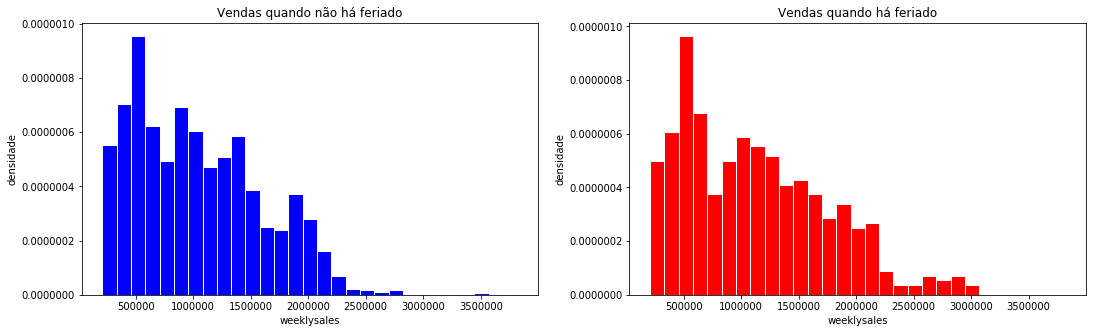

In [18]:
faixas = np.linspace(df.weeklysales.min(),df.weeklysales.max(),30)

plt.figure(figsize=(18, 5))

plt.subplot(121)
plt.hist(holiday_no.weeklysales, bins=faixas, density=True, color='blue', edgecolor='white')
plt.ylabel('densidade')
plt.xlabel('weeklysales')
plt.title('Vendas quando não há feriado')

plt.subplot(122)
plt.hist(holiday_yes.weeklysales, bins=faixas, density=True, color='red', edgecolor='white')
plt.ylabel('densidade')
plt.xlabel('weeklysales')
plt.title('Vendas quando há feriado')

plt.show()

In [19]:
# Quando tem feriado, parte dos consumidores compra mais

In [20]:
# weeklysales com temperature

# Criando faixas de temperatura correspondentes às estações - temperatura mínima a 40° F, 40° F a 55° F, 55° F a temperatura máxima
temp_minima = df.temperature.min()
temp_maxima = df.temperature.max()



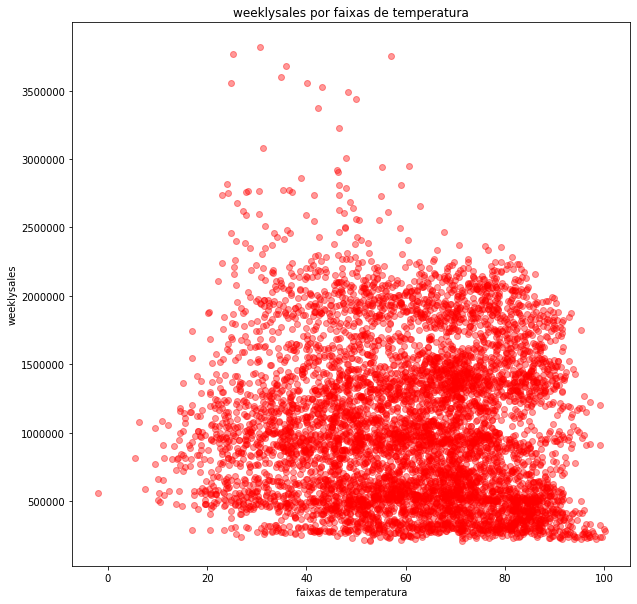

In [21]:
fig = plt.figure(figsize=(10, 10))

plt.scatter(df.temperature, df.weeklysales, c='red', alpha=0.4)
plt.title('weeklysales por faixas de temperatura')
plt.ylabel('weeklysales')
plt.xlabel('faixas de temperatura')

plt.show()

In [22]:
df.weeklysales.corr(df.temperature)

-0.0638100131794696

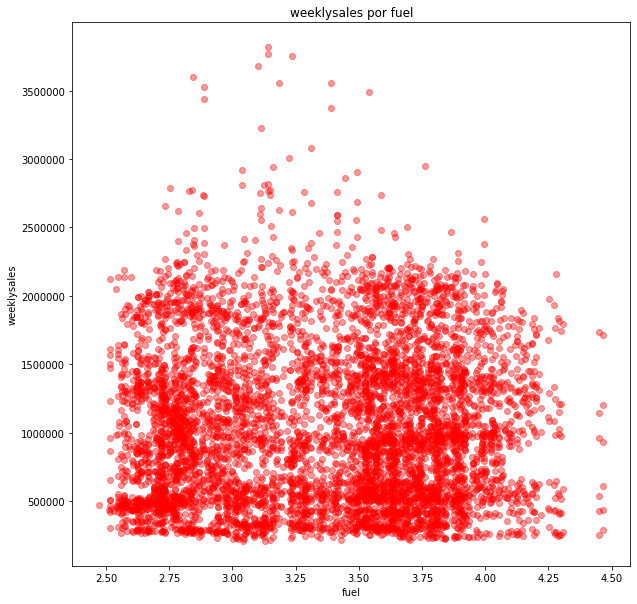

In [23]:
# weeklysales com cpi 

fig = plt.figure(figsize=(10, 10))

plt.scatter(df.fuel, df.weeklysales, c='red', alpha=0.4)
plt.title('weeklysales por fuel')
plt.ylabel('weeklysales')
plt.xlabel('fuel')

plt.show()

In [24]:
df.weeklysales.corr(df.fuel)

0.009463786314475123

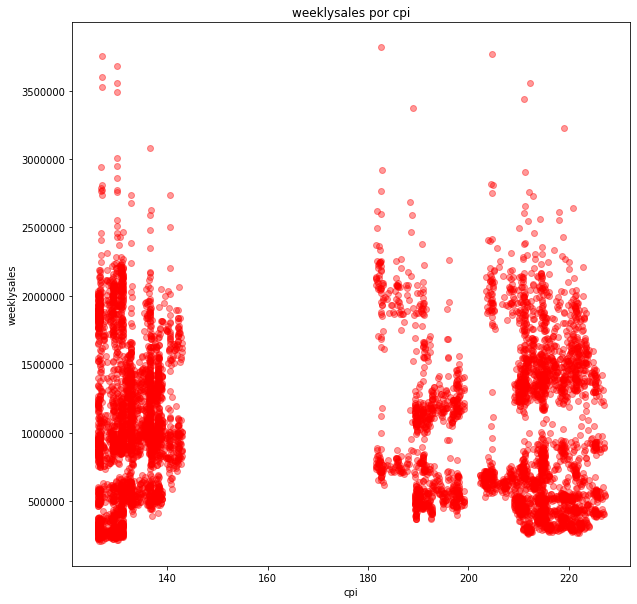

In [25]:
# weeklysales com cpi 

fig = plt.figure(figsize=(10, 10))

plt.scatter(df.cpi, df.weeklysales, c='red', alpha=0.4)
plt.title('weeklysales por cpi')
plt.ylabel('weeklysales')
plt.xlabel('cpi')

plt.show()

In [26]:
df.weeklysales.corr(df.cpi)

-0.07263416204017631

In [27]:
df.weeklysales.cov(df.cpi)

-1613322.0266282482

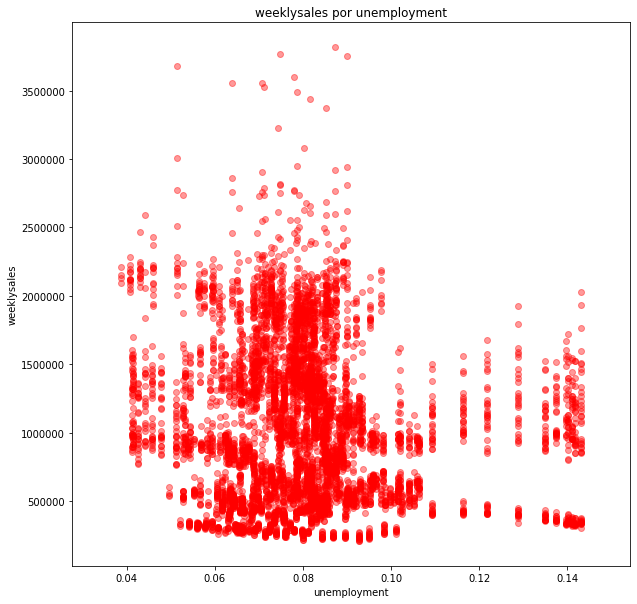

In [28]:
# weeklysales com unemployment

fig = plt.figure(figsize=(10, 10))

plt.scatter(df.unemployment, df.weeklysales, c='red', alpha=0.4)
plt.title('weeklysales por unemployment')
plt.ylabel('weeklysales')
plt.xlabel('unemployment')

plt.show()

In [29]:
df.weeklysales.corr(df.unemployment)

-0.10617608965795428

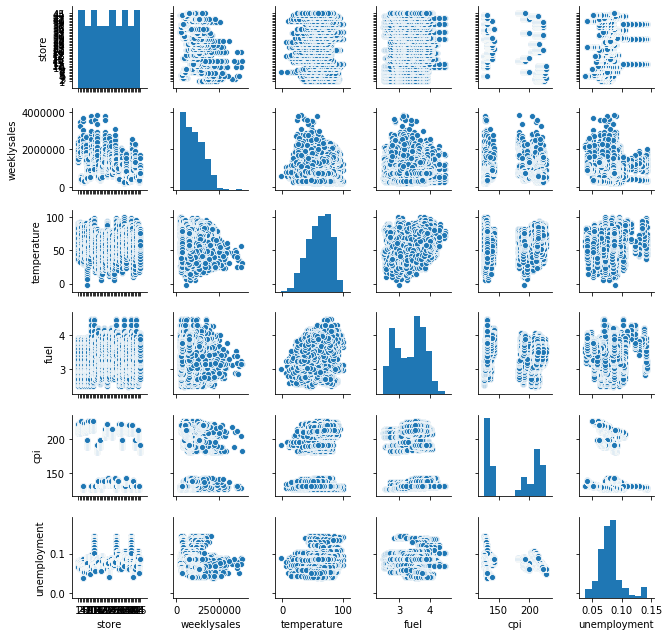

In [30]:
sns.pairplot(df, height=1.5);

In [31]:
# Regressão linear simples para a combinação weeklysales e unemployment

x = df[['temperature','fuel','cpi','unemployment']]
y = df['weeklysales']

xc = sm.add_constant(x)
model = sm.OLS(y,xc)
results = model.fit()
results.summary()

/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            weeklysales   R-squared:                       0.024
Model:                            OLS   Adj. R-squared:                  0.024
Method:                 Least Squares   F-statistic:                     40.09
Date:                Thu, 12 Nov 2020   Prob (F-statistic):           3.21e-33
Time:                        11:23:31   Log-Likelihood:                -94273.
No. Observations:                6435   AIC:                         1.886e+05
Df Residuals:                    6430   BIC:                         1.886e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         1.744e+06   7.96e+04     21.918      0.000    1.59e+06     1.9e+06
temperature   -885.6699    396.195     -2.235      0.025   -1662.345    -108.995
fuel         -1.225e+04   1.58e+04     -0.778      0.437   -4.31e+04    1.86e+04
cpi          -1585.8180    195.164     -8.126      0.000   -1968.404   -1203.232
unemployment -4.121e+06   3.97e+05    -10.375      0.000    -4.9e+06   -3.34e+06
==============================================================================
Omnibus:                      370.623   Durbin-Watson:                   0.113
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              437.779
Skew:                           0.639   Prob(JB):                     8.66e-96
Kurtosis:                       3.010   Cond. No.                     1.07e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.07e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## - Modelos de Predição -

## - Processo e Estatísticas de Validação -

## - Conclusão -

## - Referências Bibliográficas -

Commit:
    
Membros: Andressa, Camila, Luiz, Matheus